<a href="https://colab.research.google.com/github/ccplanet/GithupTest/blob/master/sklearn%E5%AD%A6%E4%B9%A0%E6%9B%B2%E7%BA%BF%E4%B8%8E%E5%8F%82%E6%95%B0%E9%AA%8C%E8%AF%81%E6%9B%B2%E7%BA%BF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
## 学习曲线
from sklearn.model_selection import learning_curve #学习曲线模块
from sklearn.datasets import load_digits #digits数据集
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt #可视化模块
import numpy as np

In [0]:
# 加载digits数据集，其包含的是手写体的数字，从0到9。
# 数据集总共有1797个样本，每个样本由64个特征组成， 分别为其手写体对应的8×8像素表示，每个特征取值0~16。
digits = load_digits()
X = digits.data
y = digits.target

In [0]:
# learning_curve训练学习曲线
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001), X, y, cv=10, scoring='neg_mean_squared_error', # 采用K折交叉验证 cv=10,,选择平均方差检视模型
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1]) # 样本由小到大分成5轮检视学习曲线(10%, 25%, 50%, 75%, 100%):

#平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

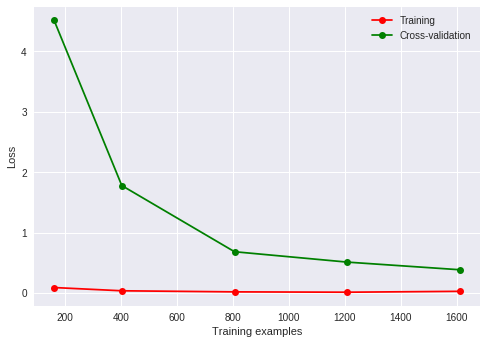

In [13]:
# 可视化图形:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

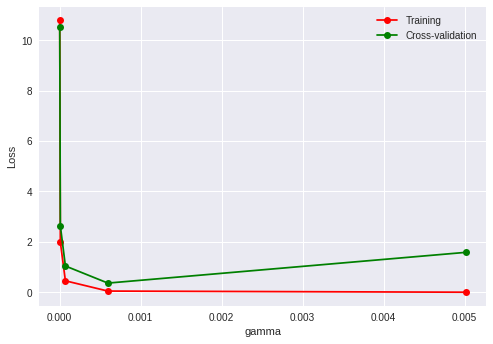

In [14]:
## 验证曲线
# 使用validation_curve 验证SVC中的一个参数 gamma 在什么范围内能使 model 产生好的结果. 以及过拟合和 gamma 取值的关系.

from sklearn.model_selection import validation_curve
from sklearn.datasets import load_digits 
from sklearn.svm import SVC 
import matplotlib.pyplot as plt 
import numpy as np
#digits数据集
digits = load_digits()
X = digits.data
y = digits.target

#建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

#使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

#平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

#可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
        label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()
# 由图中可以明显看到gamma值大于0.001，模型就会有过拟合(Overfitting)的问题。